In [70]:
import numpy as np
import pandas as pd
import scipy.stats as scs
import matplotlib.pyplot as plt
import seaborn as sns

from bs4 import BeautifulSoup

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.simplefilter('ignore')

In [30]:
df = pd.read_json('data/data.json')

In [51]:
df.dtypes

acct_type              object
approx_payout_date      int64
body_length             int64
channels                int64
country                object
currency               object
delivery_method       float64
description            object
email_domain           object
event_created           int64
event_end               int64
event_published       float64
event_start             int64
fb_published            int64
gts                   float64
has_analytics           int64
has_header            float64
has_logo                int64
listed                 object
name                   object
name_length             int64
num_order               int64
num_payouts             int64
object_id               int64
org_desc               object
org_facebook          float64
org_name               object
org_twitter           float64
payee_name             object
payout_type            object
previous_payouts       object
sale_duration         float64
sale_duration2          int64
show_map  

In [32]:
def fraud(string):
    if 'fraud' in string:
        return True
    else:
        return False

In [33]:
df['fraud'] = df.acct_type.apply(lambda x: fraud(x))

In [34]:
fraud_df = df[df['fraud']==True]
nofraud_df = df[df['fraud']==False]

In [35]:
df['fraud'].value_counts()[1] / (df['fraud'].value_counts()[1] + df['fraud'].value_counts()[0])

0.09018623142916929

In [36]:
df.columns

Index(['acct_type', 'approx_payout_date', 'body_length', 'channels', 'country',
       'currency', 'delivery_method', 'description', 'email_domain',
       'event_created', 'event_end', 'event_published', 'event_start',
       'fb_published', 'gts', 'has_analytics', 'has_header', 'has_logo',
       'listed', 'name', 'name_length', 'num_order', 'num_payouts',
       'object_id', 'org_desc', 'org_facebook', 'org_name', 'org_twitter',
       'payee_name', 'payout_type', 'previous_payouts', 'sale_duration',
       'sale_duration2', 'show_map', 'ticket_types', 'user_age',
       'user_created', 'user_type', 'venue_address', 'venue_country',
       'venue_latitude', 'venue_longitude', 'venue_name', 'venue_state',
       'fraud'],
      dtype='object')

In [37]:
print('Average sale duration for fraudulent cases: ' + str(fraud_df.sale_duration.mean()))
print('Average sale duration for non fraudulent cases: ' + str(nofraud_df.sale_duration.mean()))

Average sale duration for fraudulent cases: 14.12595744680851
Average sale duration for non fraudulent cases: 49.827631275467056


In [38]:
print('Average body length for fraudulent cases: ' + str(fraud_df.body_length.mean()))
print('Average body length for non fraudulent cases: ' + str(nofraud_df.body_length.mean()))

Average body length for fraudulent cases: 1508.8863109048723
Average body length for non fraudulent cases: 3886.9945568843914


In [39]:
df.fb_published.value_counts()

0    12510
1     1827
Name: fb_published, dtype: int64

In [40]:
df['body_length_0'] = df['body_length'] == 0

crosstab = pd.crosstab(df['fraud'], df['body_length_0'])
crosstab 

scs.chi2_contingency(crosstab)

body_length_0,False,True
fraud,,
False,12545,499
True,963,330


(1012.5099331727978,
 3.428262877129229e-222,
 1,
 array([[12289.76438585,   754.23561415],
        [ 1218.23561415,    74.76438585]]))

In [46]:
crosstab = pd.crosstab(df['fraud'], df['currency'])
crosstab 

scs.chi2_contingency(crosstab)

currency,AUD,CAD,EUR,GBP,MXN,NZD,USD
fraud,,,,,,,
False,767,1280,225,1879,0,55,8838
True,12,42,37,343,1,0,858


(243.81213099879608,
 8.610211682662582e-50,
 6,
 array([[7.08744926e+02, 1.20277380e+03, 2.38371207e+02, 2.02160619e+03,
         9.09813769e-01, 5.00397573e+01, 8.82155430e+03],
        [7.02550743e+01, 1.19226198e+02, 2.36287926e+01, 2.00393806e+02,
         9.01862314e-02, 4.96024273e+00, 8.74445700e+02]]))

In [47]:
crosstab = pd.crosstab(df['fraud'], df['user_type'])
crosstab 

scs.chi2_contingency(crosstab)

user_type,1,2,3,4,5,103
fraud,,,,,,
False,2810,0,7225,2951,56,2
True,928,1,295,66,3,0


(1559.295167373765,
 0.0,
 5,
 array([[3.40088387e+03, 9.09813769e-01, 6.84179954e+03, 2.74490814e+03,
         5.36790123e+01, 1.81962754e+00],
        [3.37116133e+02, 9.01862314e-02, 6.78200460e+02, 2.72091860e+02,
         5.32098765e+00, 1.80372463e-01]]))

In [50]:
crosstab = pd.crosstab(df['email_domain'], df['fraud'])
crosstab 

scs.chi2_contingency(crosstab)

fraud,False,True
email_domain,,
.com,11,0
10-12businessclub.co.uk,1,0
1015.com,4,0
101cs.co.uk,1,0
1121.us,1,0
126.com,0,2
1313main.com,1,0
140ventures.com,1,0
1415broad.ca,1,0


(5812.622022998958,
 0.34727247069345385,
 5771,
 array([[10.00795145,  0.99204855],
        [ 0.90981377,  0.09018623],
        [ 3.63925507,  0.36074493],
        ...,
        [ 0.90981377,  0.09018623],
        [ 2.72944131,  0.27055869],
        [ 0.90981377,  0.09018623]]))

In [52]:
crosstab = pd.crosstab(df['delivery_method'], df['fraud'])
crosstab 

scs.chi2_contingency(crosstab)

fraud,False,True
delivery_method,,
0.0,7319,1201
1.0,5481,73
3.0,240,7


(685.9537970341822,
 1.1143601002221166e-149,
 2,
 array([[7757.89400182,  762.10599818],
        [5057.19991621,  496.80008379],
        [ 224.90608198,   22.09391802]]))

In [54]:
crosstab = pd.crosstab(df['fb_published'], df['fraud'])
crosstab 

scs.chi2_contingency(crosstab)

fraud,False,True
fb_published,,
0,11246,1264
1,1798,29


(139.88599482044754,
 2.8193183055354003e-32,
 1,
 array([[11381.77024482,  1128.22975518],
        [ 1662.22975518,   164.77024482]]))

In [56]:
crosstab = pd.crosstab(df['venue_country'], df['fraud'])
crosstab 

scs.chi2_contingency(crosstab)

fraud,False,True
venue_country,,
,777,99
AE,2,3
AR,5,4
AT,4,0
AU,673,10
BE,15,0
BG,1,0
BR,1,0
BS,3,0


(1177.8858614666442,
 5.29739288027085e-202,
 68,
 array([[8.15028128e+02, 6.09718724e+01],
        [4.65198703e+00, 3.48012970e-01],
        [8.37357665e+00, 6.26423347e-01],
        [3.72158962e+00, 2.78410376e-01],
        [6.35461428e+02, 4.75385718e+01],
        [1.39559611e+01, 1.04403891e+00],
        [9.30397406e-01, 6.96025941e-02],
        [9.30397406e-01, 6.96025941e-02],
        [2.79119222e+00, 2.08807782e-01],
        [1.05507066e+03, 7.89293417e+01],
        [9.30397406e-01, 6.96025941e-02],
        [1.86079481e+00, 1.39205188e-01],
        [9.30397406e-01, 6.96025941e-02],
        [9.30397406e-01, 6.96025941e-02],
        [9.30397406e-01, 6.96025941e-02],
        [3.34943066e+01, 2.50569339e+00],
        [9.30397406e-01, 6.96025941e-02],
        [9.30397406e-01, 6.96025941e-02],
        [9.30397406e-01, 6.96025941e-02],
        [1.86079481e+01, 1.39205188e+00],
        [9.30397406e-01, 6.96025941e-02],
        [4.83806651e+01, 3.61933489e+00],
        [1.71007043e+03, 1

In [61]:
crosstab = pd.crosstab(df['payout_type'], df['fraud'])
crosstab 

scs.chi2_contingency(crosstab)

fraud,False,True
payout_type,,
,42,451
ACH,9854,812
CHECK,3148,30


(4363.877914291854, 0.0, 2, array([[ 448.53818791,   44.46181209],
        [9704.07365558,  961.92634442],
        [2891.38815652,  286.61184348]]))

In [64]:
def plot_distributions(feature_name, limit = None):
    

    # Take a sample from non-fraud so that peaks are more comparable
    non_fraud = pd.Series(np.random.choice(df[feature_name][df.fraud==0], 1400))

    fraud = df[feature_name][df.fraud==1]
    fraud.hist(bins = 30, label = 'Fraud')
    non_fraud.hist(bins = 30, label = 'Not Fraud', alpha = .5)
    plt.suptitle("{} Distributions".format(feature_name))
    plt.xlabel(feature_name)
    plt.ylabel('Count')
    plt.legend()
    if limit is not None:
        plt.xlim(0, limit)

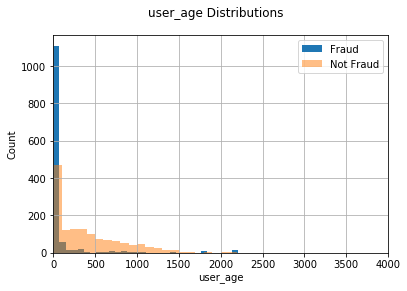

In [66]:
plot_distributions('user_age', 4000)